In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Rice-Gonen and Jasmine.csv', sep=',')
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [4]:
data = data[['Roundness', 'AspectRation']]
print(data)

       Roundness  AspectRation
0       0.764510      1.440796
1       0.831658      1.453137
2       0.868434      1.465950
3       0.870203      1.483456
4       0.874743      1.510000
...          ...           ...
18180   0.663444      2.912535
18181   0.641362      2.916910
18182   0.682832      2.925396
18183   0.635227      2.941216
18184   0.672274      2.967245

[18185 rows x 2 columns]


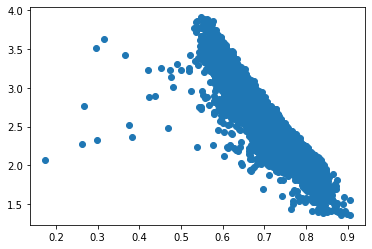

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['Roundness'], data['AspectRation'])
plt.show()

In [7]:
x_array = np.array(data)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

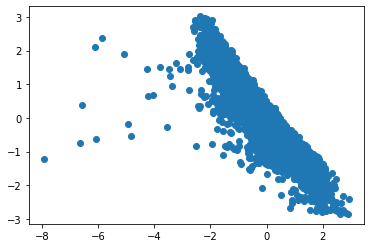

In [9]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1])

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [11]:
kmeans.cluster_centers_

array([[ 0.94665108, -0.94011621],
       [-1.26282721,  1.31979385],
       [-0.49534386,  0.44071737]])

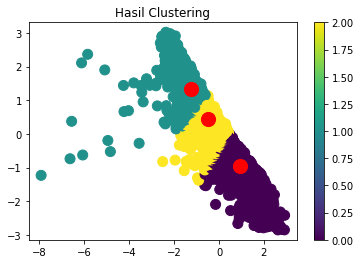

In [12]:
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=100 ,c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
plt.title('Hasil Clustering')
plt.colorbar(output)
plt.show()